In [1]:
import numpy as np
import tensorflow as tf
from numpy.random import randn
from qibo import gates, hamiltonians, models, set_backend
set_backend("tensorflow")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import entropy
import argparse  

[Qibo 0.1.7rc0|INFO|2021-11-17 09:28:13]: Using tensorflow backend on /device:CPU:0


In [2]:
def plot_loss(g_loss, d_loss, nqubits, samples, bins, latent_dim, layers, training_samples, batch_samples, lr):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')    
    fig = plt.figure(figsize=[10.5/1.5, 7.5/1.5])
    plt.ylabel('Loss', fontsize=17)
    plt.xlabel('Epoch', fontsize=17)
    plt.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator')
    plt.plot(np.linspace(0, len(d_loss), len(d_loss)), d_loss, label='discriminator')
    plt.rcParams["axes.linewidth"]  = 1.25
    plt.legend()
    plt.show()
    fig.savefig(f"loss_{samples}_{bins}_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}.pdf", bbox_inches='tight')

In [3]:
nqubits = 6
latent_dim = 3
layers = 2
training_samples = 100
batch_samples = 128
lr = 0.1
bins = 10
samples = training_samples
pixels = 64

In [4]:
d_loss = np.loadtxt(f"dloss_Handwritten-0-digit_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}")
g_loss = np.loadtxt(f"gloss_Handwritten-0-digit_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}")
params = np.loadtxt(f"PARAMS_Handwritten-0-digit_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}")

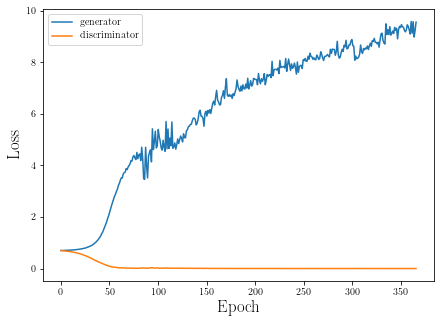

In [5]:
plot_loss(g_loss, d_loss, nqubits, samples, bins, latent_dim, layers, training_samples, batch_samples, lr)

In [18]:
# plot some images:
layers = 1
params = np.loadtxt(f"0-digits-1-layer/PARAMS_Handwritten-0-digit_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}")
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
    for i in range(0, nqubits-1):
        circuit.add(gates.CRY(i, i+1, 0))
    circuit.add(gates.CRY(nqubits-1, 0, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))

from gaussian_example import generate_fake_samples, generate_real_samples, generate_training_real_samples

s = generate_training_real_samples(100)
real, _ = generate_real_samples(s,10)
gen_img, _ = generate_fake_samples(params, latent_dim, 10, circuit, nqubits, layers, pixels)

imgs = np.reshape(gen_img, (10,8,8))
ref = np.reshape(real, (10,8,8))


/var/folders/9v/sgtl_cr512bd4vsqskhfldh80000gn/T/ipykernel_3529/4129488112.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(imgs[i])


<Figure size 432x288 with 0 Axes>

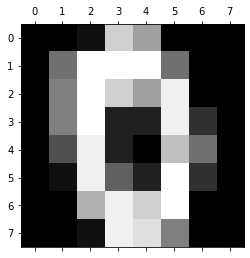

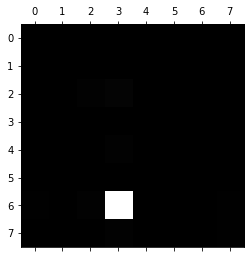

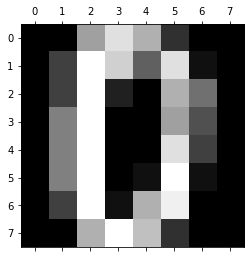

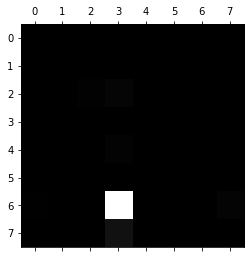

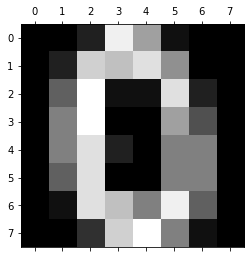

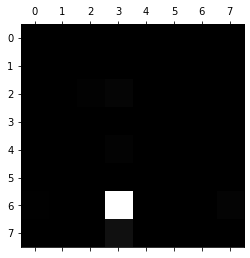

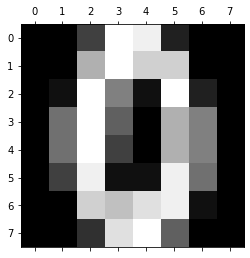

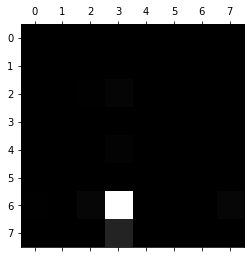

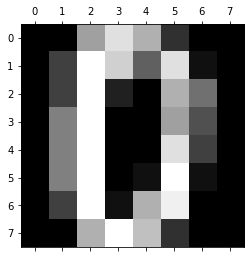

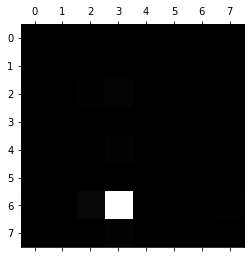

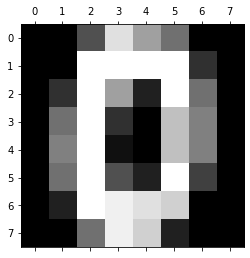

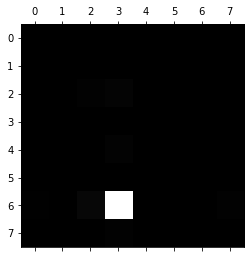

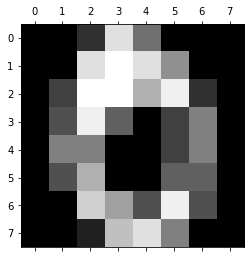

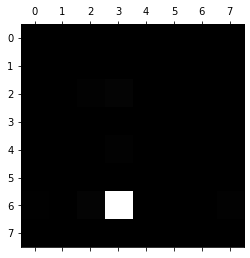

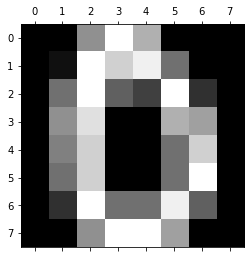

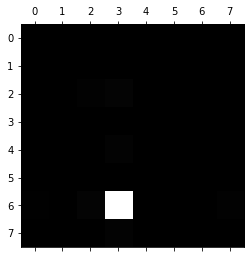

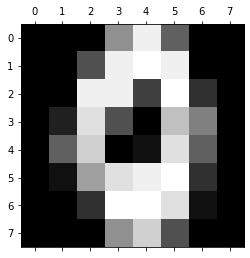

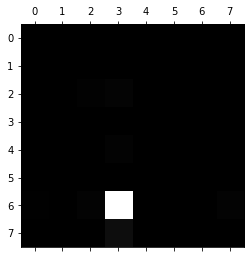

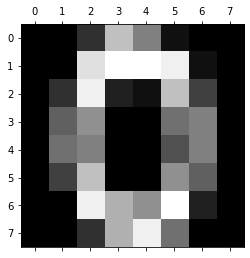

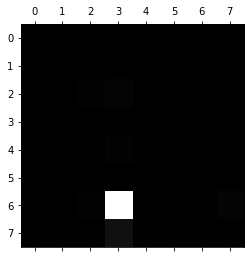

In [27]:
plt.gray()
for i in range(len(ref)):
    #lt.subplot(1, 2, 1)
    plt.matshow(ref[i])
    plt.matshow(imgs[i])
plt.show()

In [21]:
# plot some images:
layers = 2
params = np.loadtxt(f"0-digits-2-layer/PARAMS_Handwritten-0-digit_{nqubits}_{latent_dim}_{layers}_{training_samples}_{batch_samples}_{lr}")
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
    for i in range(0, nqubits-1):
        circuit.add(gates.CRY(i, i+1, 0))
    circuit.add(gates.CRY(nqubits-1, 0, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))

from gaussian_example import generate_fake_samples, generate_real_samples, generate_training_real_samples

s = generate_training_real_samples(100)
real, _ = generate_real_samples(s,10)
gen_img, _ = generate_fake_samples(params, latent_dim, 10, circuit, nqubits, layers, pixels)

imgs = np.reshape(gen_img, (10,8,8))
ref = np.reshape(real, (10,8,8))

/var/folders/9v/sgtl_cr512bd4vsqskhfldh80000gn/T/ipykernel_3529/4129488112.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(imgs[i])


<Figure size 432x288 with 0 Axes>

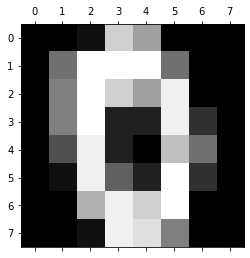

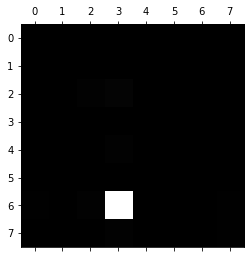

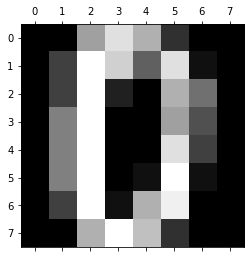

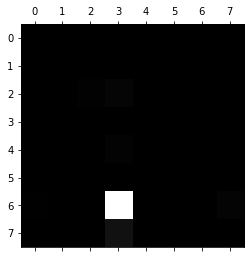

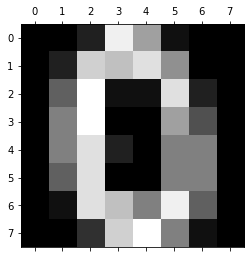

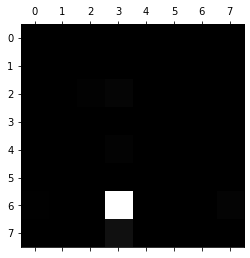

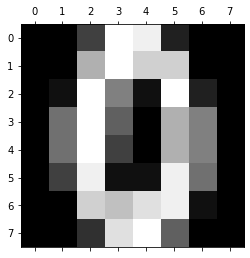

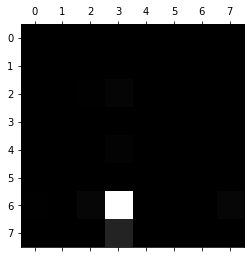

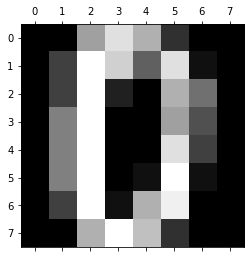

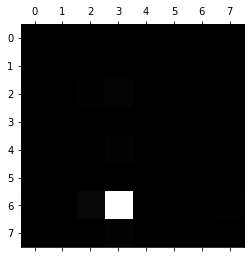

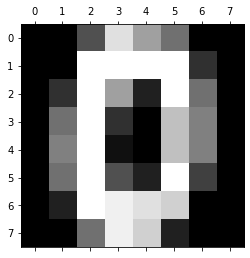

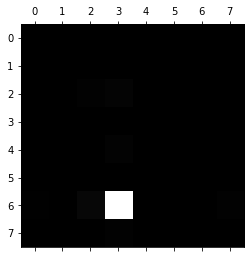

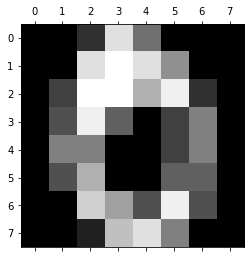

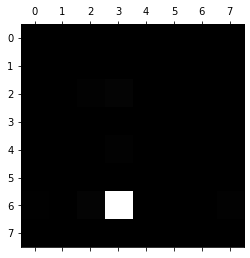

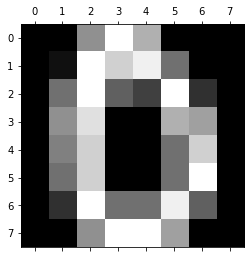

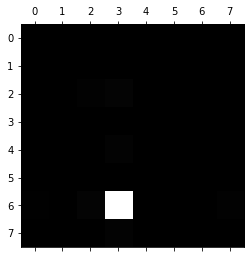

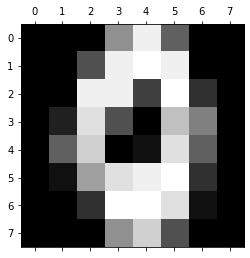

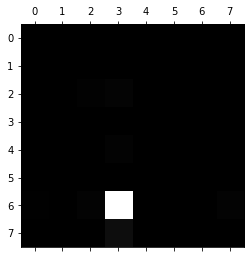

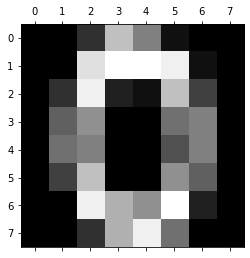

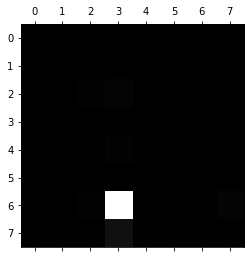

In [28]:
plt.gray()
for i in range(len(ref)):
    #lt.subplot(1, 2, 1)
    plt.matshow(ref[i])
    plt.matshow(imgs[i])
plt.show()